In [190]:
import pandas as pd
import numpy as np
import datetime

import warnings
warnings.filterwarnings('ignore')

data_path = "data.csv"
date_cero = pd.to_datetime(1490195805, unit='s') - pd.to_datetime(1490195805, unit='s')

# Analisis de los datos

In [191]:
df = pd.read_csv(data_path)

df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date'])
df['Planned_Delivery_End_Date'] = pd.to_datetime(df['Planned_Delivery_End_Date'])
df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date'])
df['Last_Modified_Date'] = pd.to_datetime(df['Last_Modified_Date'])

In [192]:
df.shape

(16947, 52)

In [193]:
df.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,16947.0,16947.000000,13738.000000,13738.000000,16947.000000,16947.000000,1.688800e+04,1.694700e+04
mean,17666.650440,0.807990,0.583584,0.475482,0.318876,0.0,5335.940225,7.012128,0.432554,2017.137428,2.338172,1.993659e+06,3.224117e+06
std,6940.859372,0.393893,0.492979,0.499413,0.466055,0.0,3324.723809,18.858359,0.758659,0.829603,12.169339,1.848426e+07,2.030360e+07
min,4854.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00
25%,11953.000000,1.000000,0.000000,0.000000,0.000000,0.0,2448.500000,0.360000,0.373260,2016.000000,0.000000,2.677500e+04,8.546580e+04
50%,18114.000000,1.000000,1.000000,0.000000,0.000000,0.0,5306.000000,0.400000,0.412850,2017.000000,0.000000,1.072500e+05,3.760672e+05
75%,23845.500000,1.000000,1.000000,1.000000,1.000000,0.0,7698.000000,0.505000,0.476490,2018.000000,1.000000,4.603898e+05,1.037450e+06
max,28773.000000,1.000000,1.000000,1.000000,1.000000,0.0,12803.000000,80.000000,67.000000,2020.000000,500.000000,1.320000e+09,1.356339e+09


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  object        
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Submitted_for_Approval              16947 non-null  int64         
 8   Bureaucratic_Code                   16947 non-null  object        
 9   Account_Created_Date                16947 non-null  object        
 10  Source                

In [195]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [196]:
df.dtypes.value_counts()

object            35
int64              9
datetime64[ns]     4
float64            4
dtype: int64

In [197]:
df['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

# Desarrollo del analisis

Haciendo el analisis en el pipeline, evaluamos en funcion de las oportunidades que terminaron ya sean 'Closed Lost' como 'Closed Won' y con estos vemos tanto las fechas pactadas de delivery con la ultima modificacion y su fecha de creacion, tambien lo agrupamos por region y analizamos tambien la media de esto en 'TRF'.

In [198]:
df_fin = df[(df['Stage'] == 'Closed Lost') | (df['Stage'] == 'Closed Won')]\
[['Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Opportunity_Created_Date', 'Stage', 'Last_Modified_Date', 'Region', 'Total_Taxable_Amount', 'ASP_(converted)']]

df_fin

,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Opportunity_Created_Date,Stage,Last_Modified_Date,Region,Total_Taxable_Amount,ASP_(converted)
0,2016-05-01,2016-06-30,2015-12-07,Closed Lost,2016-06-13,EMEA,5272800.0,0.58817
1,2016-01-18,2016-01-20,2015-12-07,Closed Won,2016-01-15,EMEA,48230.0,0.59948
2,2016-01-25,2016-01-25,2015-12-08,Closed Won,2016-09-29,Americas,83865.6,0.48000
3,2018-02-01,2018-03-31,2015-12-08,Closed Lost,2018-03-27,Americas,7421881.5,0.53000
4,2018-02-01,2018-02-28,2015-12-08,Closed Lost,2018-03-27,Americas,13357192.5,0.53000
...,...,...,...,...,...,...,...,...
16942,2016-03-21,2016-03-25,2015-12-04,Closed Won,2016-01-19,EMEA,299715.0,0.58817
16943,2016-04-04,2016-04-08,2015-12-04,Closed Won,2016-01-19,EMEA,299715.0,0.58817
16944,2016-03-28,2016-03-31,2015-12-04,Closed Won,2016-01-19,EMEA,299715.0,0.58817
16945,2016-04-25,2016-04-29,2015-12-05,Closed Lost,2016-01-22,Americas,0.0,0.63750


In [199]:
df_fin['time_modified_diff'] = df_fin['Planned_Delivery_Start_Date'] - df_fin['Opportunity_Created_Date']
df_fin['time_modified_diff'] = df_fin['time_modified_diff'].dt.days
df_fin['after_time'] = (df_fin['Planned_Delivery_End_Date'] - df_fin['Last_Modified_Date']).dt.days
df_fin['ahead_of_time'] = (df_fin['Planned_Delivery_Start_Date'] - df_fin['Last_Modified_Date']).dt.days

df_fin.head()

,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Opportunity_Created_Date,Stage,Last_Modified_Date,Region,Total_Taxable_Amount,ASP_(converted),time_modified_diff,after_time,ahead_of_time
0,2016-05-01,2016-06-30,2015-12-07,Closed Lost,2016-06-13,EMEA,5272800.0,0.58817,146,17.0,-43
1,2016-01-18,2016-01-20,2015-12-07,Closed Won,2016-01-15,EMEA,48230.0,0.59948,42,5.0,3
2,2016-01-25,2016-01-25,2015-12-08,Closed Won,2016-09-29,Americas,83865.6,0.48000,48,-248.0,-248
3,2018-02-01,2018-03-31,2015-12-08,Closed Lost,2018-03-27,Americas,7421881.5,0.53000,786,4.0,-54
4,2018-02-01,2018-02-28,2015-12-08,Closed Lost,2018-03-27,Americas,13357192.5,0.53000,786,-27.0,-54


In [200]:
modified = []
j = 0
for v in df_fin['ahead_of_time']:
    actual = df_fin['after_time'].iloc[j]
    if v>0:
        modified.append('Antes')
    elif actual<0:
        modified.append('Despues')
    else:
        modified.append('Durante')
    j+=1
df_fin['modified_in_time'] = modified
df_fin

,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Opportunity_Created_Date,Stage,Last_Modified_Date,Region,Total_Taxable_Amount,ASP_(converted),time_modified_diff,after_time,ahead_of_time,modified_in_time
0,2016-05-01,2016-06-30,2015-12-07,Closed Lost,2016-06-13,EMEA,5272800.0,0.58817,146,17.0,-43,Durante
1,2016-01-18,2016-01-20,2015-12-07,Closed Won,2016-01-15,EMEA,48230.0,0.59948,42,5.0,3,Antes
2,2016-01-25,2016-01-25,2015-12-08,Closed Won,2016-09-29,Americas,83865.6,0.48000,48,-248.0,-248,Despues
3,2018-02-01,2018-03-31,2015-12-08,Closed Lost,2018-03-27,Americas,7421881.5,0.53000,786,4.0,-54,Durante
4,2018-02-01,2018-02-28,2015-12-08,Closed Lost,2018-03-27,Americas,13357192.5,0.53000,786,-27.0,-54,Despues
...,...,...,...,...,...,...,...,...,...,...,...,...
16942,2016-03-21,2016-03-25,2015-12-04,Closed Won,2016-01-19,EMEA,299715.0,0.58817,108,66.0,62,Antes
16943,2016-04-04,2016-04-08,2015-12-04,Closed Won,2016-01-19,EMEA,299715.0,0.58817,122,80.0,76,Antes
16944,2016-03-28,2016-03-31,2015-12-04,Closed Won,2016-01-19,EMEA,299715.0,0.58817,115,72.0,69,Antes
16945,2016-04-25,2016-04-29,2015-12-05,Closed Lost,2016-01-22,Americas,0.0,0.63750,142,98.0,94,Antes


In [201]:
by_region = df_fin.groupby(['Stage', 'modified_in_time', 'Region'])\
.agg({'Total_Taxable_Amount':'sum', 'ASP_(converted)':'sum'})
by_region

Total_Taxable_Amount  \
Stage       modified_in_time Region                              
Closed Lost Antes            APAC                 4.839300e+09   
                             Americas             8.630189e+09   
                             EMEA                 3.019651e+09   
                             Japan                5.023697e+09   
                             Middle East          5.739293e+06   
            Despues          APAC                 1.225614e+09   
                             Americas             1.821726e+09   
                             EMEA                 2.129474e+09   
                             Japan                4.030489e+09   
                             Middle East          2.618639e+08   
            Durante          APAC                 1.088780e+09   
                             Americas             1.074892e+09   
                             EMEA                 7.258181e+08   
                             Japan                1.252107e+09   
                             Middle East          1.006539e+08   
Closed Won  Antes            APAC                 9.970478e+07   
                             Americas             3.657364e+09   
                             EMEA                 2.686881e+08   
                             Japan                3.818786e+09   
                             Middle East          1.969140e+06   
            Despues          APAC                 3.754899e+08   
                             Americas             8.910993e+08   
                             EMEA                 8.586321e+08   
                             Japan                6.744066e+09   
                             Middle East          3.953125e+06   
            Durante          APAC                 1.028560e+08   
                             Americas             2.025524e+07   
                             EMEA                 8.723937e+07   
                             Japan                1.054850e+08   
                             Middle East          1.374469e+06   

                                          ASP_(converted)  
Stage       modified_in_time Region                        
Closed Lost Antes            APAC               195.65683  
                             Americas           342.30300  
                             EMEA               310.59045  
                             Japan               93.33456  
                             Middle East          3.65500  
            Despues          APAC               243.22328  
                             Americas           413.53889  
                             EMEA               550.26223  
                             Japan              210.92307  
                             Middle East         27.63600  
            Durante          APAC                90.24758  
                             Americas           110.94500  
                             EMEA               129.48795  
                             Japan                9.63573  
                             Middle East         11.50500  
Closed Won  Antes            APAC               119.02122  
                             Americas           253.64020  
                             EMEA               258.65668  
                             Japan              200.80296  
                             Middle East          5.12500  
            Despues          APAC               474.94580  
                             Americas           429.00033  
                             EMEA               741.75777  
                             Japan              488.48721  
                             Middle East          9.21000  
            Durante          APAC                77.90223  
                             Americas            40.01750  
                             EMEA                63.68121  
                             Japan               13.69157  
                             Middle East          3.31200

In [202]:
by_region = by_region.reset_index()
by_region.columns = ['Stage', 'modified_in_time', 'Region', 'Total_Taxable_Amount_sum', 'ASP_sum']

by_region = by_region.sort_values('Stage', ascending = False)
by_region.head()

,Stage,modified_in_time,Region,Total_Taxable_Amount_sum,ASP_sum
15,Closed Won,Antes,APAC,9.970478e+07,119.02122
16,Closed Won,Antes,Americas,3.657364e+09,253.64020
28,Closed Won,Durante,Japan,1.054850e+08,13.69157
27,Closed Won,Durante,EMEA,8.723937e+07,63.68121
26,Closed Won,Durante,Americas,2.025524e+07,40.01750


## Grafico

Text(0, 0.5, 'Momento de ultima modificación respecto al rango de fechas acordado')

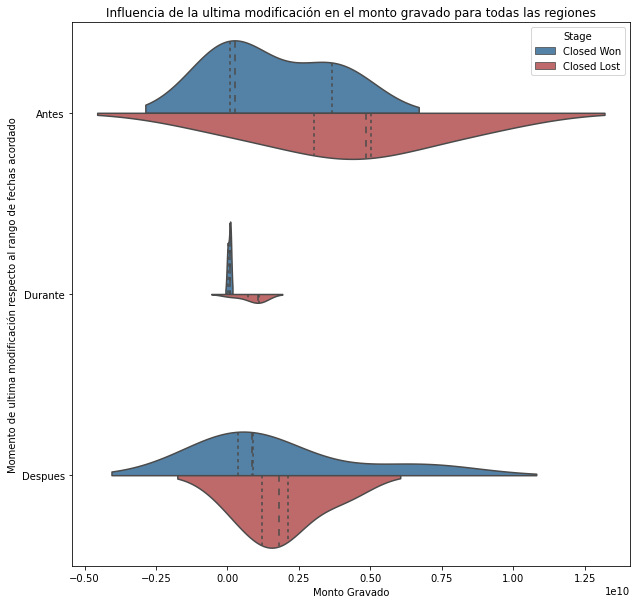

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

pal = {'Closed Won': 'steelblue', 'Closed Lost': 'indianred'}

fig, ax = plt.subplots(figsize = (10, 10))
plt.title('Influencia de la ultima modificación en el monto gravado para todas las regiones')
sns.violinplot( y='modified_in_time', x='Total_Taxable_Amount_sum', hue = 'Stage', data=by_region, split=True,  inner="quartile", palette=pal)

ax.set_xlabel('Monto Gravado')
ax.set_ylabel('Momento de ultima modificación respecto al rango de fechas acordado')